# Finite Difference

In [2]:
import sympy
from sympy import init_printing, pprint, latex 
from sympy import binomial, Function, factorial, Symbol, symbols, Sum, S  
# S is for SingletonRegistry
from sympy import Rational as Rat
from sympy import Matrix, solve_linear_system

EY : 20160627 I have no idea what `sympy.SingletonRegistry` means despite the [documentation for SingletonRegistry](http://docs.sympy.org/0.7.1/_modules/sympy/core/singleton.html), which is sparse at best.  

In [3]:
init_printing() # LaTeX printing 

In [4]:
n = Symbol('n',integer=True,positive=True)
i = Symbol('i',integer=True,positive=True)
j = Symbol('j',integer=True,positive=True)
x,h,x_0 = symbols('x h x_0',real=True)
f = Function('f')

In [8]:
factorial(5)

120

In [18]:
C_n = Sum((-1)**i*binomial(n,i),(i,1,n))


In [24]:
(C_n.subs(n,3)).evalf()

-1.00000000000000

cf. From *stackexchange* [How to do a symbolic taylor expansion of an unknown function $f(x)$ using sympy](http://stackoverflow.com/questions/16869587/how-to-do-a-symbolic-taylor-expansion-of-an-unknown-function-fx-using-sympy)

In [78]:
f(x).series(x, x0=x_0, n=3)

                                                ⎛  2        ⎞│                
                                              2 ⎜ d         ⎟│                
                                      (x - x₀) ⋅⎜────(f(ξ₁))⎟│                
                                                ⎜   2       ⎟│                
                 ⎛ d        ⎞│                  ⎝dξ₁        ⎠│ξ₁=x₀    ⎛      
f(x₀) + (x - x₀)⋅⎜───(f(ξ₁))⎟│      + ───────────────────────────── + O⎝(x - x
                 ⎝dξ₁       ⎠│ξ₁=x₀                 2                         

            
            
            
            
  3        ⎞
₀) ; x → x₀⎠
            

In [32]:
pprint( f(x).series(x, x0=h, n=3) )

                                              ⎛  2        ⎞│                  
                                            2 ⎜ d         ⎟│                  
                                    (-h + x) ⋅⎜────(f(ξ₁))⎟│                  
                                              ⎜   2       ⎟│                  
                ⎛ d        ⎞│                 ⎝dξ₁        ⎠│ξ₁=h    ⎛        3
f(h) + (-h + x)⋅⎜───(f(ξ₁))⎟│     + ──────────────────────────── + O⎝(-h + x) 
                ⎝dξ₁       ⎠│ξ₁=h                2                            

        
        
        
        
       ⎞
; x → h⎠
        


In [33]:
latex(f(x).series(x, x0=h, n=3) )

'f{\\left (h \\right )} + \\left(- h + x\\right) \\left. \\frac{d}{d \\xi_{1}} f{\\left (\\xi_{1} \\right )} \\right|_{\\substack{ \\xi_{1}=h }} + \\frac{1}{2} \\left(- h + x\\right)^{2} \\left. \\frac{d^{2}}{d \\xi_{1}^{2}}  f{\\left (\\xi_{1} \\right )} \\right|_{\\substack{ \\xi_{1}=h }} + \\mathcal{O}\\left(\\left(- h + x\\right)^{3}; x\\rightarrowh\\right)'

In [37]:
FW = f(x+h).series(x+h, x0=x_0, n=3)
FW = FW.subs(x-x_0,0)

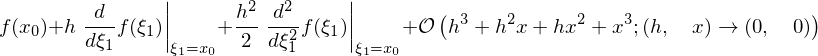

In [38]:
FW

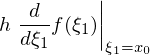

In [42]:
FW.args[0]

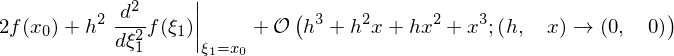

In [55]:
(f(x+h).series(x+h,x0=x_0,n=3)+f(x-h).series(x-h,x0=x_0,n=3)).subs(x-x_0,0)

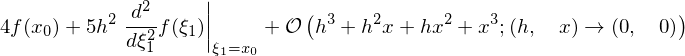

In [62]:
( f(x+h).series(x+h,x0=x_0,n=3) + f(x-h).series(x-h,x0=x_0,n=3) + \
f(x+2*h).series(x+2*h,x0=x_0,n=3) + f(x-2*h).series(x-2*h,x0=x_0,n=3) ).subs(x-x_0,0)

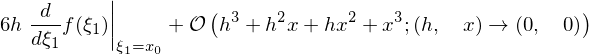

In [63]:
( f(x+h).series(x+h,x0=x_0,n=3) - f(x-h).series(x-h,x0=x_0,n=3) + \
f(x+2*h).series(x+2*h,x0=x_0,n=3) - f(x-2*h).series(x-2*h,x0=x_0,n=3) ).subs(x-x_0,0)

finite-difference for the 1st order derivative ($n=1$), to the $p$th-order, $p=8$

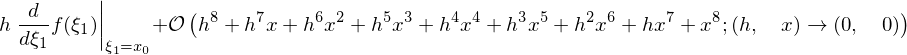

In [77]:
p = 8
( Rat(4,5)*(f(x+h).series(x+h,x0=x_0,n=p) - f(x-h).series(x-h,x0=x_0,n=p)) + \
Rat(-1,5)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)-f(x-2*h).series(x-2*h,x0=x_0,n=p)) + \
Rat(4,105)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)-f(x-3*h).series(x-3*h,x0=x_0,n=p)) + \
Rat(-1,280)*(f(x+4*h).series(x+4*h,x0=x_0,n=p)-f(x-4*h).series(x-4*h,x0=x_0,n=p)) ).subs(x-x_0,0)

In [74]:
Rat(4,5)

### *centered difference approximation*   
  
$$-i_{\text{min}} = (d+p-1)/2 $$  
$$i_{\text{max}} = \lceil (d+p-1)/2 \rceil $$

cf. [Derivative Approximation by Finite Differences
David Eberly](http://math.nyu.edu/~atm262/fall06/compmethods/a1/DerivativesApproximationByFiniteDifferences.pdf)  

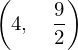

In [88]:
d = 2 
p = 8
sympy.floor(Rat(d+p-1,2)), Rat((d+p-1),2)

First order derivatives $d=1$; let's aim for $-i_{\text{min}} = i_{\text{max}} = 2$ so we only need 2 neighbor values.

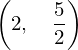

In [104]:
d = 1 
p = 5
sympy.floor(Rat(d+p-1,2)), Rat((d+p-1),2)

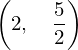

In [106]:
d = 2 
p = 4
sympy.floor(Rat(d+p-1,2)), Rat((d+p-1),2)

In [4]:
C_1,C_2,C_3,C_4 = symbols('C_1 C_2 C_3 C_4', integer=True)

From `sympy` documentation, [Matrices (linear algebra), Basic Manipulation](http://docs.sympy.org/0.7.2/modules/matrices/matrices.html), I learned to construct matrices with the `lambda` function

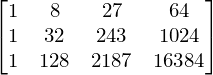

In [117]:
Matrix(3,4, lambda i,j: (j+1)**(2*(i+1)+1))

In [116]:
Matrix(1,4,lambda i,j: 2*(j+1))

In [138]:
C_nu_d1p6 = sympy.zeros(4,5) # d = 1, p = 6
C_nu_d1p6[:3,:4] = Matrix(3,4,lambda i,j: (j+1)**(2*(i+1)+1))
C_nu_d1p6[3,:4] = Matrix(1,4,lambda i,j: 2*(j+1))
C_nu_d1p6[3,4] = Rat(1)

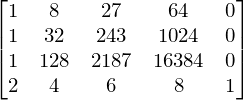

In [139]:
C_nu_d1p6

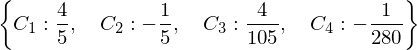

In [148]:
solve_linear_system( C_nu_d1p6, C_1,C_2,C_3,C_4 )

Also, another way is this:

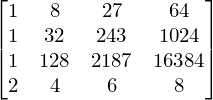

In [142]:
C_nuM_d1p6 = sympy.zeros(4,4) # d = 1, p = 6
C_nuM_d1p6[:3,:4] = Matrix(3,4,lambda i,j: (j+1)**(2*(i+1)+1))
C_nuM_d1p6[3,:4] = Matrix(1,4,lambda i,j: 2*(j+1))
C_nuM_d1p6

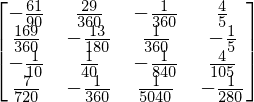

In [144]:
C_nuM_d1p6.inv() # and then read off the last column

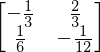

In [146]:
Matrix([[1,8],[2,4]]).inv() # d = 1, p=2

In [4]:
C_nu_d1p4 = sympy.zeros(3,4) # d = 1, p = 4
C_nu_d1p4[:2,:3] = Matrix(2,3,lambda i,j: (j+1)**(2*(i+1)+1))
C_nu_d1p4[2,:3] = Matrix(1,3,lambda i,j: 2*(j+1))
C_nu_d1p4[2,3] = Rat(1)

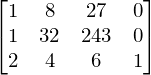

In [5]:
C_nu_d1p4

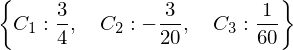

In [8]:
solve_linear_system( C_nu_d1p4, C_1,C_2,C_3 )

Indeed, 

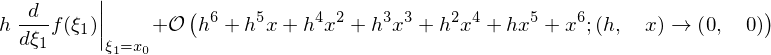

In [9]:
p = 6
( Rat(3,4)*(f(x+h).series(x+h,x0=x_0,n=p) - f(x-h).series(x-h,x0=x_0,n=p)) + \
Rat(-3,20)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)-f(x-2*h).series(x-2*h,x0=x_0,n=p)) + \
Rat(1,60)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)-f(x-3*h).series(x-3*h,x0=x_0,n=p))).subs(x-x_0,0)

$$
\boxed{   h \frac{d}{dx}f(x) =  \frac{3}{4} ( f(x+h) - f(x-h) ) + \frac{-3}{20}( f(x+2h) - f(x-2h)) + \frac{1}{60} (f(x+3h)-f(x-3h)) +O(h^6) = \sum_{\nu = 1}^3 C_{\nu} (f(x+ \nu h) - f(x - \nu h) ) + O(h^6) }
  $$

with  

 * $C_1 = \frac{3}{4}$  
 * $C_2 = \frac{-3}{20}$  
 * $C_3 = \frac{1}{60}$


Let's generalize this procedure:

In [60]:
def make_C_nu_dp(NU):
    C_nu_dp = sympy.zeros(NU,NU+1)
    C_nu_dp[:NU-1,:NU] = Matrix(NU-1,NU,lambda i,j: (j+1)**(2*(i+1)+1))
    #C_nu_dp[NU-1,:NU]  = Matrix(1,NU,lambda i,j:2*(j+1))
    C_nu_dp[NU-1,:NU]  = Matrix(1,NU,lambda i,j:(j+1))
    C_nu_dp[NU-1,NU]   = Rat(1,2)

    # sanity check
    pprint( C_nu_dp)
    Cnus = symbols(' '.join( ['C_'+str(nu)for nu in range(1,NU+1)]), real=True)
    return solve_linear_system( C_nu_dp, *Cnus )

In [61]:
make_C_nu_dp(2)

⎡1  8   0 ⎤
⎢         ⎥
⎣1  2  1/2⎦


{C_1: 2/3, C_2: -1/12}

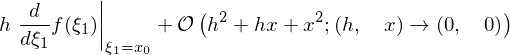

In [70]:
# sanity check
p=2
(Rat(2,3)*(f(x+h).series(x+h,x0=x_0,n=p) - f(x-h).series(x-h,x0=x_0,n=p)) + \
Rat(-1,12)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)-f(x-2*h).series(x-2*h,x0=x_0,n=p))).simplify()


⎡1  8   27    0 ⎤
⎢               ⎥
⎢1  32  243   0 ⎥
⎢               ⎥
⎣1  2    3   1/2⎦


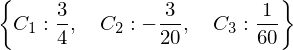

In [71]:
make_C_nu_dp(3)

⎡1   8    27    64     0 ⎤
⎢                        ⎥
⎢1  32   243   1024    0 ⎥
⎢                        ⎥
⎢1  128  2187  16384   0 ⎥
⎢                        ⎥
⎣1   2    3      4    1/2⎦


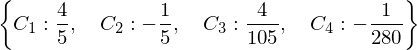

In [72]:
make_C_nu_dp(4)

Let's attempt to further generalize this procedure for $d=1$.  

Consider the following easy examples for $p=1$.  

Now
$$
f(x \pm h) = f(x) + (\frac{ \partial f}{ \partial x}(x) )( \pm h) + \mathcal{O}(h^2)  
$$  
$$
f(x+h) - f(x-h) = 2h \frac{ \partial f}{ \partial x} + \mathcal{O}(h^2) \text{ or } \frac{ \partial f}{ \partial x} = \frac{ f(x+h) - f(x-h) }{2h} + \mathcal{O}(h)
$$

Likewise, for so-called forward and backward difference operators:
$$ 
\frac{f(x+h) - f(x)}{h} = \frac{ \partial f}{ \partial x}  
$$
$$ 
\frac{f(x) - f(x-h)}{h} = \frac{ \partial f}{ \partial x}  
$$
Conjecture that 
$$
\boxed{
\frac{ \partial f}{ \partial x} = \sum^N_{\nu = 1} C_{\nu} (f(x+ \nu h) - f(x-\nu h) ) \left( \frac{1}{h} \right)
}
$$

and so doing the Taylor expansion,
$$
f(x \pm \nu h) =\sum_{j=0}^{p} \frac{ f^{(j)}(x) }{j!} ( \pm \nu h)^j + \mathcal{O}(h^{p+1}) = \sum_{j'=0}^{p'} \frac{ f^{(2j')}(x) }{ (2j')! } (\nu h)^{2j'} + \sum_{j'=0}^{p'} \frac{ f^{(2j'+1) }(x) }{ (2j'+1)!} (\nu h)^{2j'+1} (\pm 1) + \mathcal{O}(h^{p+1} )
$$
where $p := 2p'+1$.  

Clearly, for $f(x+\nu h) - f(x-\nu h)$, all the "even" terms in the Taylor series expansion cancel each other out, leaving
$$
f(x+\nu h) - f(x-\nu h) = \sum_{j'=0}^{p'} \frac{ 2f^{(2j'+1)}(x) }{(2j'+1)!} (\nu h)^{2j'+1} + O(h^{p+1}) = 2\nu h \frac{ \partial f}{\partial x} + \sum_{j'=1}^{p'} \frac{2(\nu h)^{2j' +1} }{ (2j'+1)! } f^{(2j'+1) }(x) + \mathcal{O}(h^{p+1} ) 
$$

and so with our previous assumption (caveat),  

$$
\sum_{\nu =1}^{N} C_{\nu} ( f(x+ \nu h) - f(x-\nu h)) \frac{1}{h} = \sum_{\nu =1}^N C_{\nu} \left( 2\nu \frac{ \partial f}{ \partial x} + \sum_{j'=1}^{p'} \frac{ 2\nu ^{2j'+1} }{ (2j'+1)! } f^{(2j+1) }(x) h^{2j'} \right) + \mathcal{O}(h^{p} )
$$

Then we obtain a system of linear equations that we'd want to solve:

$$
\sum_{\nu =1}^N 2C_{\nu} \nu = 1 
$$  

$$
\sum_{j'=1}^{p'} \left( \sum_{\nu =1}^N C_{\nu} \frac{2\nu^{2j'+1} }{ (2j'+1)! } \right) f^{(2j+1) }(x) h^{2j'} = 0 \text{ or }  \left( \sum_{\nu =1}^N C_{\nu} \frac{ 2 \nu^{2j'+1} }{ (2j'+1)! } \right) = 0 \qquad \, \forall \, j' = 1 \dots p'
$$



Thus, we confirm the `make_C_nu_dp(NU)` Python function for $d=1$.  

## Backward difference operator, in the case of $d=1$, first-order derivative

For the backward difference operator, then consider the following:

$$
\frac{ \partial f}{ \partial x} = \sum_{ \nu =0}^N \frac{1}{h} C_{\nu} f(x-\nu h) = \sum_{\nu = 0}^N \frac{C_{\nu} }{ h} \left[ f(x) + \left( \frac{ \partial f}{ \partial x} \right) (-\nu h) + \sum_{j=2}^p \frac{ f^{(j)}(x) }{j!} (-\nu h)^j \right] + \mathcal{O}(h^p)
$$

which leads to a system of linear equations:

$$
\frac{1}{h} \sum_{\nu =0}^N C_{\nu} = 0 
$$

$$ 
- \sum_{\nu =0}^N C_{\nu } \nu = 1
$$

$$
\sum_{j=2}^p \frac{(-h)^jf^{(j)}(x)}{ hj!} \sum_{ \nu =0}^N C_{\nu} \nu^j = 0
$$

and I didn't make it explicit before, and neither here, but you can divide both sides of the equation by constant values that *don't* depend on index $j$ (or $\nu$) and obtain the system of linear equations to solve.

⎡1  1  1  1   0 ⎤
⎢               ⎥
⎢0  1  2  3   -1⎥
⎢               ⎥
⎢0  1  4  9   0 ⎥
⎢               ⎥
⎣0  1  8  27  0 ⎦
(C₀, C₁, C₂, C₃)


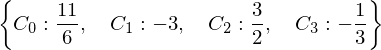

In [126]:
NU = 3
C_nueqns = sympy.zeros(NU+1,NU+2)
C_nueqns[0,:NU+1] = Matrix(1,NU+1,lambda i,j: 1)
C_nueqns[1,:NU+1] = Matrix(1,NU+1,lambda i,j:j)
C_nueqns[1,NU+1] = -1
if NU > 1:
    C_nueqns[2:NU+1,:NU+1] = Matrix(NU-1,NU+1,lambda i,j: j**(i+2) )
pprint(C_nueqns)
Cnus = symbols(' '.join( ['C_'+str(nu)for nu in range(NU+1)]), real=True)
pprint(Cnus)
solve_linear_system( C_nueqns,*Cnus)

In [127]:
def make_backwardC_nu(NU):
    C_nueqns = sympy.zeros(NU+1,NU+2)
    C_nueqns[0,:NU+1]  = Matrix(1,NU+1,lambda i,j: 1)

    C_nueqns[1,:NU+1]  = Matrix(1,NU+1,lambda i,j: j)
    C_nueqns[1,NU+1]   = -1

    if NU > 1:
        C_nueqns[2:NU+1,:NU+1] = Matrix(NU-1,NU+1,lambda i,j: (j)**(i+2) )

    # sanity check
    pprint( C_nueqns)    
        
    Cnus = symbols(' '.join( ['C_'+str(nu)for nu in range(NU+1)]), real=True)
    return solve_linear_system( C_nueqns, *Cnus )

In [122]:
make_backwardC_nu(1)

⎡1  1  0 ⎤
⎢        ⎥
⎣0  1  -1⎦


⎡1  1  1  0 ⎤
⎢           ⎥
⎢0  1  2  -1⎥
⎢           ⎥
⎣0  1  4  0 ⎦


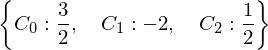

In [128]:
make_backwardC_nu(2)

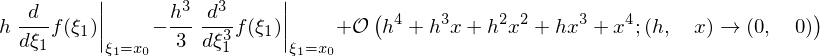

In [168]:
# sanity check
f(x).series(x,x0=x_0,n=4).subs(x-x_0,0)
f(x-h).series(x-h,x0=x_0,n=4).subs(x-x_0,0)
f(x-2*h).series(x-2*h,x0=x_0,n=4).subs(x-x_0,0)

p=4
( Rat(3,2)*f(x).series(x,x0=x_0,n=p).subs(x-x_0,0) + \
  Rat(-2)*( f(x-h).series(x-h,x0=x_0,n=p) ).subs(x-x_0,0) + \
Rat(1,2)*( f(x-2*h).series(x-2*h,x0=x_0,n=p)).subs(x-x_0,0) )


⎡1  1  1  1   0 ⎤
⎢               ⎥
⎢0  1  2  3   -1⎥
⎢               ⎥
⎢0  1  4  9   0 ⎥
⎢               ⎥
⎣0  1  8  27  0 ⎦


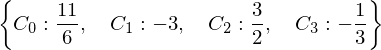

In [137]:
make_backwardC_nu(3)

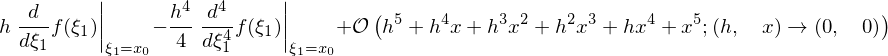

In [169]:
# sanity check
p=5
( Rat(11,6)*f(x).series(x,x0=x_0,n=p).subs(x-x_0,0) + \
  Rat(-3)*( f(x-h).series(x-h,x0=x_0,n=p) ).subs(x-x_0,0) + \
Rat(3,2)*( f(x-2*h).series(x-2*h,x0=x_0,n=p)).subs(x-x_0,0) + \
Rat(-1,3)*( f(x-3*h).series(x-3*h,x0=x_0,n=p)).subs(x-x_0,0) 
)


⎡1  1  1   1    1   0 ⎤
⎢                     ⎥
⎢0  1  2   3    4   -1⎥
⎢                     ⎥
⎢0  1  4   9   16   0 ⎥
⎢                     ⎥
⎢0  1  8   27  64   0 ⎥
⎢                     ⎥
⎣0  1  16  81  256  0 ⎦


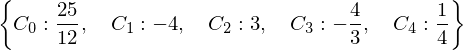

In [138]:
make_backwardC_nu(4)

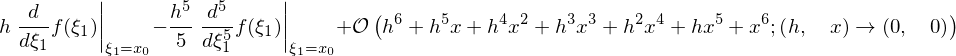

In [171]:
# sanity check
p=6
( Rat(25,12)*f(x).series(x,x0=x_0,n=p).subs(x-x_0,0) + \
  Rat(-4)*( f(x-h).series(x-h,x0=x_0,n=p) ).subs(x-x_0,0) + \
Rat(3)*( f(x-2*h).series(x-2*h,x0=x_0,n=p)).subs(x-x_0,0) + \
Rat(-4,3)*( f(x-3*h).series(x-3*h,x0=x_0,n=p)).subs(x-x_0,0) + \
Rat(1,4)*( f(x-4*h).series(x-4*h,x0=x_0,n=p)).subs(x-x_0,0) 
)

#### For $d=2$

In [164]:
C_nu_d2p4 = sympy.zeros(2,3) # d = 2, p = 4
C_nu_d2p4[:1,:2] = Matrix(1,2,lambda i,j: (j+1)**(2*(i+2)))
C_nu_d2p4[1,:2] = Matrix(1,2,lambda i,j: 2*(j+1)**2)
C_nu_d2p4[1,2] = Rat(1)

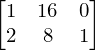

In [165]:
C_nu_d2p4

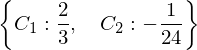

In [166]:
solve_linear_system( C_nu_d2p4, C_1,C_2)

In [168]:
C_nu_d2p6 = sympy.zeros(3,4) # d = 2, p = 6
C_nu_d2p6[:2,:3] = Matrix(2,3,lambda i,j: (j+1)**(2*(i+2)))
C_nu_d2p6[2,:3] = Matrix(1,3,lambda i,j: 2*(j+1)**2)
C_nu_d2p6[2,3] = Rat(1)

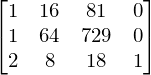

In [169]:
C_nu_d2p6

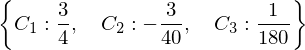

In [170]:
solve_linear_system( C_nu_d2p6, C_1,C_2,C_3)

Indeed, 

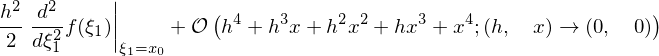

In [172]:
p = 4
( Rat(2,3)*(f(x+h).series(x+h,x0=x_0,n=p) + f(x-h).series(x-h,x0=x_0,n=p) -2*f(x_0)) + \
Rat(-1,24)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)+f(x-2*h).series(x-2*h,x0=x_0,n=p) -2*f(x_0))).subs(x-x_0,0)

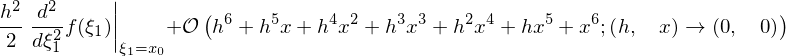

In [175]:
p = 6
( Rat(3,4)*(f(x+h).series(x+h,x0=x_0,n=p) + f(x-h).series(x-h,x0=x_0,n=p)-2*f(x_0)) + \
Rat(-3,40)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)+f(x-2*h).series(x-2*h,x0=x_0,n=p)-2*f(x_0)) + \
Rat(1,180)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)+f(x-3*h).series(x-3*h,x0=x_0,n=p)-2*f(x_0))).subs(x-x_0,0)

## Central difference operator, in the case of $d=2$, 2nd-order derivative


Let's attempt to further generalize this procedure for $d=2$.  

Consider the following easy examples for $p=1$.  

Now
$$
f(x \pm h) = f(x) + (\frac{ \partial f}{ \partial x}(x) )( \pm h) + ( \frac{1}{2} \frac{ \partial^2 f}{ \partial x^2}(x) )h^2 + \mathcal{O}(h^2)  
$$  
$$
f(x+h) + f(x-h) = 2f(x) + h^2 \frac{ \partial^2 f}{ \partial x^2} + \mathcal{O}(h^3) \text{ or } \frac{ \partial^2 f}{ \partial x^2} = \frac{ f(x+h) + f(x-h) - 2f(x) }{h^2} + \mathcal{O}(h)
$$

And so

$$
f(x \pm \nu h) = f(x) + (\frac{ \partial f}{ \partial x}(x) )( \pm \nu h) + (\frac{1}{2} \frac{ \partial^2 f}{ \partial x^2}(x) ) \nu^2 h^2 + \mathcal{O}(h^2)  
$$  
$$
f(x+\nu h) + f(x-\nu h) = 2f(x) + \nu^2 h^2 \frac{ \partial^2 f}{ \partial x^2} + \mathcal{O}(h^3) \text{ or } \frac{ \partial^2 f}{ \partial x^2} = \frac{ f(x+\nu h) + f(x-\nu h) - 2f(x) }{\nu^2 h^2} + \mathcal{O}(h)
$$


Conjecture that 
$$
\boxed{
\frac{ \partial^2 f}{ \partial x^2} = \sum^N_{\nu = 1} C_{\nu} (f(x+ \nu h) + f(x-\nu h) -2f(x) ) \left( \frac{1}{h^2} \right)
}
$$
(yes, the $\frac{1}{\nu^2}$ factor was swallowed into $C_{\nu}$.)

and so doing the Taylor expansion,
$$
f(x \pm \nu h) =\sum_{j=0}^{p} \frac{ f^{(j)}(x) }{j!} ( \pm \nu h)^j + \mathcal{O}(h^{p+1}) = \sum_{j'=0}^{p'} \frac{ f^{(2j')}(x) }{ (2j')! } (\nu h)^{2j'} + \sum_{j'=0}^{p'} \frac{ f^{(2j'+1) }(x) }{ (2j'+1)!} (\nu h)^{2j'+1} (\pm 1) + \mathcal{O}(h^{p+1} )
$$
where $p := 2p'+1$.  

Clearly, for $f(x+\nu h) + f(x-\nu h)$, all the "odd" terms in the Taylor series expansion cancel each other out, leaving
$$
f(x+\nu h) + f(x-\nu h) -2f(x)= \sum_{j'=1}^{p'} \frac{ 2f^{(2j')}(x) }{(2j')!} (\nu h)^{2j'} + O(h^{p+1}) =  \frac{ 2f''(x)}{2} (\nu h)^2 + \sum_{j'=2}^{p'} \frac{2(\nu h)^{2j' } }{ (2j')! } f^{(2j') }(x) + \mathcal{O}(h^{p+1} ) 
$$

and so with our previous assumption (caveat),  

$$
\sum_{\nu =1}^{N} C_{\nu} ( f(x+ \nu h) + f(x-\nu h) -2f(x)) \frac{1}{h^2} = \sum_{\nu =1}^N C_{\nu} \left(  \nu^2 f''(x)h^2 + \sum_{j'=2}^{p'} \frac{ 2\nu ^{2j'} }{ (2j')! } f^{(2j') }(x) h^{2j'} \right) \frac{1}{h^2} + \mathcal{O}(h^{p} ) = \sum_{\nu =1}^N \left[ C_{\nu} \nu^2  f''(x) + C_{\nu} \sum_{j'=2}^{p'} \frac{ 2\nu^{2j'} }{ (2j')!} f^{(2j') }(x)h^{2(j'-1) } \right] + \mathcal{O}(h^p)
$$

Then we obtain a system of linear equations that we'd want to solve:

$$
\sum_{\nu =1}^N \nu^2 C_{\nu}  = 1 
$$  

$$
\sum_{j'=2}^{p'} \left( \sum_{\nu =1}^N C_{\nu} \frac{ 2\nu^{2j'} }{ (2j')! } \right)= 0 
$$



In [36]:
def make_C_nu_d2p(NU):
    C_nu_dp = sympy.zeros(NU,NU+1)
    C_nu_dp[:NU-1,:NU] = Matrix(NU-1,NU,lambda i,j: (j+1)**(2*(i+2)))

    C_nu_dp[NU-1,:NU]  = Matrix(1,NU,lambda i,j:(j+1)**2)
    C_nu_dp[NU-1,NU]   = Rat(1)

    # sanity check
    pprint( C_nu_dp)
    Cnus = symbols(' '.join( ['C_'+str(nu)for nu in range(1,NU+1)]), real=True)
    return solve_linear_system( C_nu_dp, *Cnus )

⎡1  16  0⎤
⎢        ⎥
⎣1  4   1⎦


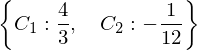

In [37]:
make_C_nu_d2p(2)

⎡1  16  81   0⎤
⎢             ⎥
⎢1  64  729  0⎥
⎢             ⎥
⎣1  4    9   1⎦


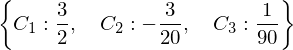

In [38]:
make_C_nu_d2p(3)

⎡1  16    81    256   0⎤
⎢                      ⎥
⎢1  64   729   4096   0⎥
⎢                      ⎥
⎢1  256  6561  65536  0⎥
⎢                      ⎥
⎣1   4    9     16    1⎦


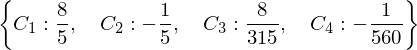

In [39]:
make_C_nu_d2p(4)

Indeed

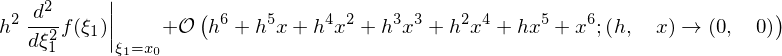

In [40]:
p = 6
( Rat(4,3)*(f(x+h).series(x+h,x0=x_0,n=p) + f(x-h).series(x-h,x0=x_0,n=p) -2*f(x_0)) + \
Rat(-1,12)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)+f(x-2*h).series(x-2*h,x0=x_0,n=p) -2*f(x_0))).subs(x-x_0,0)

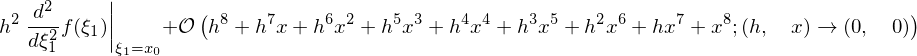

In [41]:
p = 8
( Rat(3,2)*(f(x+h).series(x+h,x0=x_0,n=p) + f(x-h).series(x-h,x0=x_0,n=p) -2*f(x_0)) + \
Rat(-3,20)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)+f(x-2*h).series(x-2*h,x0=x_0,n=p) -2*f(x_0)) + \
Rat(1,90)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)+f(x-3*h).series(x-3*h,x0=x_0,n=p) -2*f(x_0)) ).subs(x-x_0,0)

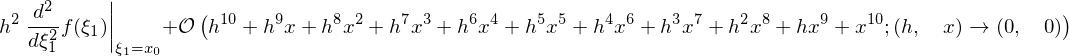

In [42]:
p = 10
( Rat(8,5)*(f(x+h).series(x+h,x0=x_0,n=p) + f(x-h).series(x-h,x0=x_0,n=p) -2*f(x_0)) + \
Rat(-1,5)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)+f(x-2*h).series(x-2*h,x0=x_0,n=p) -2*f(x_0)) + \
Rat(8,315)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)+f(x-3*h).series(x-3*h,x0=x_0,n=p) -2*f(x_0)) + \
 Rat(-1,560)*(f(x+4*h).series(x+4*h,x0=x_0,n=p)+f(x-4*h).series(x-4*h,x0=x_0,n=p) -2*f(x_0))
).subs(x-x_0,0)

# finite difference sanity check on Python numpy

In [5]:
import numpy as np

In [13]:
import matplotlib
import pylab
import numpy as np

In [14]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg','png'}

In [28]:
l_x = 2.* np.pi
l_y = 2.* np.pi
l_z = 2.* np.pi
L_x = 64 
L_y = 64 
L_z = 64
f_grid3d = np.zeros((L_x,L_y,L_z))
df_grid3d_result = np.zeros((L_x,L_y,L_z))
h_x = l_x/L_x; h_y = l_y/L_y; h_z = l_z/L_z

In [33]:
for i_z in range(L_z):
    for i_y in range(L_y):
        for i_x in range(L_x):
            f_grid3d[i_x][i_y][i_z] = np.sin( i_x*h_x)

In [26]:
f_grid3d[:,0,0].shape

(64,)

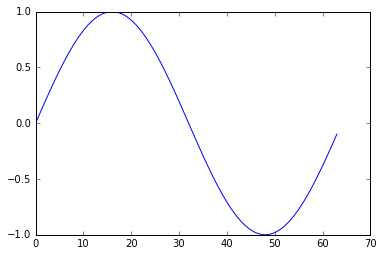

In [27]:
pylab.plot( f_grid3d[:,5,5] )

In [37]:
RAD = 3

In [38]:
for i_z in range(L_z-RAD):
    for i_y in range(L_y-RAD):
        for i_x in range(L_x-RAD):
#            if (i_z + RAD >= L_z): 
            df_grid3d_result[i_x][i_y][i_z] = \
                (3./(4.*h_x))*(f_grid3d[i_x+1][i_y][i_z]-f_grid3d[i_x-1][i_y][i_z]) + \
                (-3./(20.*h_x))*(f_grid3d[i_x+2][i_y][i_z]-f_grid3d[i_x-2][i_y][i_z]) + \
                (1./(60.*h_x))*(f_grid3d[i_x+3][i_y][i_z]-f_grid3d[i_x-3][i_y][i_z]) 

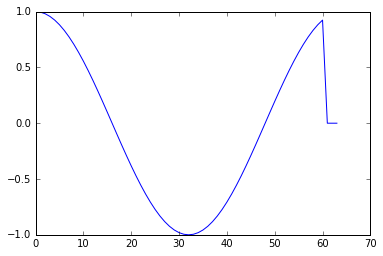

In [40]:
pylab.plot( df_grid3d_result[:,5,5] )

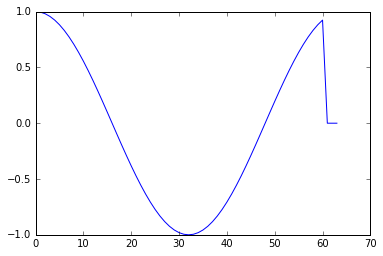

In [42]:
pylab.plot( df_grid3d_result[:,0,0] )

In [35]:
f_grid3d[-2][0][0]

-0.19509032201612872

In [ ]:
p = 6
( Rat(3,4)*(f(x+h).series(x+h,x0=x_0,n=p) - f(x-h).series(x-h,x0=x_0,n=p)) + \
Rat(-3,20)*(f(x+2*h).series(x+2*h,x0=x_0,n=p)-f(x-2*h).series(x-2*h,x0=x_0,n=p)) + \
Rat(1,60)*(f(x+3*h).series(x+3*h,x0=x_0,n=p)-f(x-3*h).series(x-3*h,x0=x_0,n=p))).subs(x-x_0,0)

# Instantons

cf. Valery Rubakov. **Classical Theory of Gauge Fields**.  Princeton, 2002.  Ch. 7.  7.1 Kink

In [182]:
t = Symbol('t',real=True)
phi1pl1 = Symbol(r'\varphi')# phi1pl1 denote phi 1+1 spacetime dimension; pl for "plus"
phi1pl1 = Function(r'\varphi')(t,x)

In [183]:
phi1pl1

In [191]:
phi1pl1.series(x=x,x0=x_0,n=3)

                                                                  ⎛  2        
                                                                2 ⎜ ∂         
                                                        (x - x₀) ⋅⎜────(\varph
                                                                  ⎜   2       
                          ⎛ ∂                 ⎞│                  ⎝∂ξ₂        
\varphi(t, x₀) + (x - x₀)⋅⎜───(\varphi(t, ξ₂))⎟│      + ──────────────────────
                          ⎝∂ξ₂                ⎠│ξ₂=x₀                     2   

         ⎞│                            
         ⎟│                            
i(t, ξ₂))⎟│                            
         ⎟│                            
         ⎠│ξ₂=x₀    ⎛        3        ⎞
──────────────── + O⎝(x - x₀) ; x → x₀⎠
                                       

In [193]:
((phi1pl1.diff(t)*phi1pl1.diff(t)) + (phi1pl1.diff(x)*phi1pl1.diff(x))).series(x=x,x0=x_0,n=3)

                                                            ⎛          ⎛  2   
                                                            ⎜        2 ⎜ ∂    
                                                            ⎜(x - x₀) ⋅⎜────(\
                            2                       2       ⎜          ⎜   2  
⎛∂                ⎞│            ⎛∂                 ⎞      ∂ ⎜          ⎝∂ξ₂   
⎜──(\varphi(t, x))⎟│          + ⎜──(\varphi(t, x₀))⎟  + 2⋅──⎜─────────────────
⎝∂x               ⎠│x=x + x₀    ⎝∂t                ⎠      ∂t⎝                 

              ⎞│     ⎞                                                        
              ⎟│     ⎟                                                        
varphi(t, ξ₂))⎟│     ⎟                                                        
              ⎟│     ⎟                                                        
              ⎠│ξ₂=x₀⎟ ∂                      ∂ ⎛         ⎛ ∂                 
─────────────────────⎟⋅──(\varphi(t, x₀)) + 2⋅──⎜(x

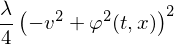

In [199]:
lambdavariablesymbol = Symbol(r'\lambda')
v = Symbol('v')
mu = Symbol(r'\mu')
m = Symbol('m')
lambdavariablesymbol/Rat(4)*(phi1pl1*phi1pl1-v**2)**2

In [201]:
(lambdavariablesymbol/Rat(4)*(phi1pl1*phi1pl1-v**2)**2).series(x=x,x0=x_0,n=2).subs(v, \
                                                        mu/sympy.sqrt( lambdavariablesymbol))

      4                                                                       
   \mu               ⎛               3        ⎛ ∂                 ⎞│          
───────── + (x - x₀)⋅⎜\lambda⋅\varphi (t, x₀)⋅⎜───(\varphi(t, ξ₂))⎟│      - \m
4⋅\lambda            ⎝                        ⎝∂ξ₂                ⎠│ξ₂=x₀     

                                                    2        2                
 2                ⎛ ∂                 ⎞│     ⎞   \mu ⋅\varphi (t, x₀)   \lambd
u ⋅\varphi(t, x₀)⋅⎜───(\varphi(t, ξ₂))⎟│     ⎟ - ──────────────────── + ──────
                  ⎝∂ξ₂                ⎠│ξ₂=x₀⎠            2                   

         4                              
a⋅\varphi (t, x₀)    ⎛        2        ⎞
───────────────── + O⎝(x - x₀) ; x → x₀⎠
     4                                  

# Dealing with Boundary conditions (with Finite Difference)

I found that I needed to represent boundary conditions that are "discretized" i.e. "numerical boundary condition" - for example on pp. 148 of Cebeci, Shao, Kafyeke, Laurendeau, (E5.2.3), I need to figure out if this is a derivative or second-order derivative:

$u_I^n = 2u^n_{I-1} - u^n_{I-2}$

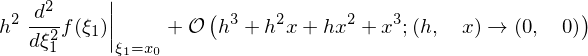

In [10]:
(f(x).series(x,x0=x_0,n=3)- 2 * f(x-h).series(x-h,x0=x_0,n=3) + \
 f(x-2*h).series(x-2*h,x0=x_0,n=3)).subs(x-x_0,0)

So indeed this is essentially

$ \frac{ \partial^2 u}{ \partial x^2} = 0$

Also consider pp. 338 of Cebeci, Shao, Kafyeke, Laurendeau (2005), namely (11.5.7a), (11.5.7b), which purports the second-order accuracy of a boundary condition, involving a first-order partial derivative:

$ \frac{ \partial u^x }{ \partial y } = 0 $ and 

$\frac{\partial p }{ \partial y} = 0 $

cf. on the "symmetry plane" of $y=H$ (these boundary conditions, $\lbrace (x,y) \in \mathbb{R}^2 | y=H \rbrace$ is a *submanifold* of $\mathbb{R}^2$ as it's a level set or from the locally imbedded theorem (from differential topology))

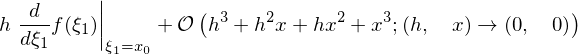

In [6]:
p=3
( Rat(3,2)*f(x).series(x,x0=x_0,n=p).subs(x-x_0,0) + \
  Rat(-2)*( f(x-h).series(x-h,x0=x_0,n=p) ).subs(x-x_0,0) + \
Rat(1,2)*( f(x-2*h).series(x-2*h,x0=x_0,n=p)).subs(x-x_0,0) )


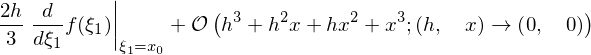

In [7]:
( Rat(1)*f(x).series(x,x0=x_0,n=p).subs(x-x_0,0) + \
  Rat(-4,3)*( f(x-h).series(x-h,x0=x_0,n=p) ).subs(x-x_0,0) + \
Rat(1,3)*( f(x-2*h).series(x-2*h,x0=x_0,n=p)).subs(x-x_0,0) )

Then "set this" first order partial derivative to zero and then you obtain the "scheme" to "discretize" the boundary condition.  

$u_{i,J} = \frac{ 4 u_{i,J-1} - u_{i,J-2} }{ 3 } $

$p_{i,J} = \frac{ 4p_{i,J-1} -p_{i,J-2} }{ 3 } $
